In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#Load the dataset
data = pd.read_csv('E://Cancer.csv')
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


## Dealing with data

In [4]:
from scipy.stats import chi2_contingency
table = pd.crosstab(data.age, data.breast)
chi_2, p_value, dof, expected = chi2_contingency(table.values)
chi_2

5.089632458666961

In [5]:
p_value

0.40503962934640186

In [6]:
#Rename  some column names
data.rename(columns={'tumor-size': 'tumorSize', 'inv-nodes': 'invNodes', 'node-caps': 'nodeCaps', 'deg-malig': 'degMalig', 'breast-quad': 'breastQuad'}, inplace = True)
data.head()

,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [7]:
from scipy.stats import spearmanr

#Finding the corralation of two features
speaprmanr_coefficient = spearmanr(data.age, data.breast)
speaprmanr_coefficient

SpearmanrResult(correlation=-0.04439163607415352, pvalue=0.4545737844379072)

In [8]:
sp_co = spearmanr(data.age, data.tumorSize)
sp_co

SpearmanrResult(correlation=-0.035748934510865644, pvalue=0.5470981483805499)

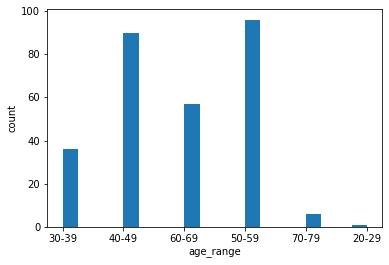

In [9]:
# frequency of features
plt.hist(data['age'], bins= 20)
plt.xlabel('age_range')
plt.ylabel('count')
plt.show()

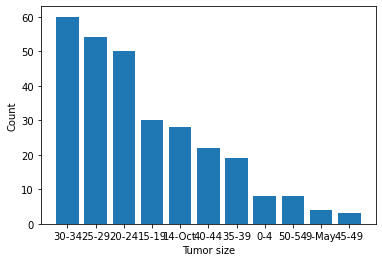

In [10]:
tumor_count = data.tumorSize.value_counts()
category = tumor_count.index
plt.bar(category, tumor_count)
plt.xlabel('Tumor size')
plt.ylabel('Count')
plt.show()

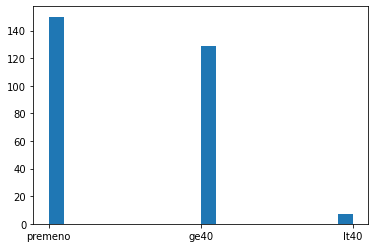

In [11]:
plt.hist(data['menopause'], bins= 20)
plt.show()

## Finding Null

In [12]:
data = data.replace('?', np.NaN)
data.isnull().sum()

age           0
menopause     0
tumorSize     0
invNodes      0
nodeCaps      8
degMalig      0
breast        0
breastQuad    1
irradiat      0
Class         0
dtype: int64

In [13]:
data.dropna(axis= 0, inplace= True)
data.isnull().sum()

age           0
menopause     0
tumorSize     0
invNodes      0
nodeCaps      0
degMalig      0
breast        0
breastQuad    0
irradiat      0
Class         0
dtype: int64

In [14]:
data.shape

(277, 10)

In [15]:
from sklearn.preprocessing import LabelEncoder
data['menopause'] = LabelEncoder().fit_transform(data['menopause'])

In [16]:
data['nodeCaps'] = LabelEncoder().fit_transform(data['nodeCaps'])
data['breast'] = LabelEncoder().fit_transform(data['breast'])
data['breastQuad'] = LabelEncoder().fit_transform(data['breastQuad'])
data['irradiat'] = data['irradiat'].map({'no': 0, 'yes': 1})
data['Class'] = data['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})

In [17]:
data.head()

,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat,Class
0,30-39,2,30-34,0-2,0,3,0,1,0,0
1,40-49,2,20-24,0-2,0,2,1,4,0,0
2,40-49,2,20-24,0-2,0,2,0,1,0,0
3,60-69,0,15-19,0-2,0,2,1,2,0,0
4,40-49,2,0-4,0-2,0,2,1,3,0,0


In [19]:
data['tumorSize'].values

array(['30-34', '20-24', '20-24', '15-19', '0-4', '15-19', '25-29',
       '20-24', '50-54', '20-24', '0-4', '25-29', '14-Oct', '25-29',
       '30-34', '30-34', '15-19', '30-34', '30-34', '30-34', '40-44',
       '15-19', '25-29', '40-44', '35-39', '25-29', '20-24', '25-29',
       '40-44', '30-34', '40-44', '15-19', '14-Oct', '14-Oct', '14-Oct',
       '30-34', '0-4', '15-19', '14-Oct', '30-34', '20-24', '25-29',
       '9-May', '14-Oct', '50-54', '30-34', '25-29', '25-29', '20-24',
       '20-24', '15-19', '20-24', '15-19', '20-24', '40-44', '40-44',
       '0-4', '9-May', '30-34', '15-19', '20-24', '14-Oct', '0-4',
       '35-39', '25-29', '14-Oct', '25-29', '20-24', '35-39', '50-54',
       '14-Oct', '25-29', '20-24', '15-19', '9-May', '14-Oct', '14-Oct',
       '25-29', '25-29', '25-29', '14-Oct', '14-Oct', '15-19', '15-19',
       '20-24', '35-39', '25-29', '0-4', '20-24', '40-44', '0-4', '20-24',
       '25-29', '20-24', '14-Oct', '30-34', '30-34', '15-19', '30-34',
       '25-

In [20]:
data['tumorSize'] = data['tumorSize'].replace('14-Oct', '10-14')
data['tumorSize'] = data['tumorSize'].replace('9-May', '5-9')
data['tumorSize'].values

array(['30-34', '20-24', '20-24', '15-19', '0-4', '15-19', '25-29',
       '20-24', '50-54', '20-24', '0-4', '25-29', '10-14', '25-29',
       '30-34', '30-34', '15-19', '30-34', '30-34', '30-34', '40-44',
       '15-19', '25-29', '40-44', '35-39', '25-29', '20-24', '25-29',
       '40-44', '30-34', '40-44', '15-19', '10-14', '10-14', '10-14',
       '30-34', '0-4', '15-19', '10-14', '30-34', '20-24', '25-29', '5-9',
       '10-14', '50-54', '30-34', '25-29', '25-29', '20-24', '20-24',
       '15-19', '20-24', '15-19', '20-24', '40-44', '40-44', '0-4', '5-9',
       '30-34', '15-19', '20-24', '10-14', '0-4', '35-39', '25-29',
       '10-14', '25-29', '20-24', '35-39', '50-54', '10-14', '25-29',
       '20-24', '15-19', '5-9', '10-14', '10-14', '25-29', '25-29',
       '25-29', '10-14', '10-14', '15-19', '15-19', '20-24', '35-39',
       '25-29', '0-4', '20-24', '40-44', '0-4', '20-24', '25-29', '20-24',
       '10-14', '30-34', '30-34', '15-19', '30-34', '25-29', '20-24',
       '30-34

In [21]:
data['invNodes'].values

array(['0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '8-Jun', '8-J

In [22]:
data['invNodes'] = data['invNodes'].replace('5-Mar', '3-5')
data['invNodes'] = data['invNodes'].replace('8-Jun', '6-8')
data['invNodes'] = data['invNodes'].replace('11-Sep', '9-11')
data['invNodes'] = data['invNodes'].replace('14-Dec', '12-14')
data['invNodes'].values

array(['0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2', '0-2',
       '6-8', '6-8',

In [23]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0]) + float(split_list[1])) / 2
    return mean

In [24]:
data['age_mean'] = data['age'].apply(lambda x: split_mean(x))
data['tumorSize_mean'] = data['tumorSize'].apply(lambda x: split_mean(x))
data['invNodes_mean'] = data['invNodes'].apply(lambda x: split_mean(x))
data.head()

,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat,Class,age_mean,tumorSize_mean,invNodes_mean
0,30-39,2,30-34,0-2,0,3,0,1,0,0,34.5,32.0,1.0
1,40-49,2,20-24,0-2,0,2,1,4,0,0,44.5,22.0,1.0
2,40-49,2,20-24,0-2,0,2,0,1,0,0,44.5,22.0,1.0
3,60-69,0,15-19,0-2,0,2,1,2,0,0,64.5,17.0,1.0
4,40-49,2,0-4,0-2,0,2,1,3,0,0,44.5,2.0,1.0


In [25]:
data.drop(['age', 'tumorSize', 'invNodes'], axis= 1, inplace= True)
data.head()

,menopause,nodeCaps,degMalig,breast,breastQuad,irradiat,Class,age_mean,tumorSize_mean,invNodes_mean
0,2,0,3,0,1,0,0,34.5,32.0,1.0
1,2,0,2,1,4,0,0,44.5,22.0,1.0
2,2,0,2,0,1,0,0,44.5,22.0,1.0
3,0,0,2,1,2,0,0,64.5,17.0,1.0
4,2,0,2,1,3,0,0,44.5,2.0,1.0


In [26]:
new_list = ['age_mean', 'tumorSize_mean', 'invNodes_mean', 'menopause', 'nodeCaps', 'degMalig', 'breast', 'breastQuad', 'irradiat', 'Class']
data = data[new_list]
data.head()

,age_mean,tumorSize_mean,invNodes_mean,menopause,nodeCaps,degMalig,breast,breastQuad,irradiat,Class
0,34.5,32.0,1.0,2,0,3,0,1,0,0
1,44.5,22.0,1.0,2,0,2,1,4,0,0
2,44.5,22.0,1.0,2,0,2,0,1,0,0
3,64.5,17.0,1.0,0,0,2,1,2,0,0
4,44.5,2.0,1.0,2,0,2,1,3,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age_mean        277 non-null    float64
 1   tumorSize_mean  277 non-null    float64
 2   invNodes_mean   277 non-null    float64
 3   menopause       277 non-null    int32  
 4   nodeCaps        277 non-null    int32  
 5   degMalig        277 non-null    int64  
 6   breast          277 non-null    int32  
 7   breastQuad      277 non-null    int32  
 8   irradiat        277 non-null    int64  
 9   Class           277 non-null    int64  
dtypes: float64(3), int32(4), int64(3)
memory usage: 19.5 KB


In [28]:
X = data.iloc[:, :9]
Y = data.iloc[:,  9]
X

,age_mean,tumorSize_mean,invNodes_mean,menopause,nodeCaps,degMalig,breast,breastQuad,irradiat
0,34.5,32.0,1.0,2,0,3,0,1,0
1,44.5,22.0,1.0,2,0,2,1,4,0
2,44.5,22.0,1.0,2,0,2,0,1,0
3,64.5,17.0,1.0,0,0,2,1,2,0
4,44.5,2.0,1.0,2,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...
281,34.5,32.0,1.0,2,0,2,0,2,0
282,34.5,22.0,1.0,2,0,3,0,2,1
283,64.5,22.0,1.0,0,0,1,1,2,0
284,44.5,32.0,4.0,0,0,3,0,1,0


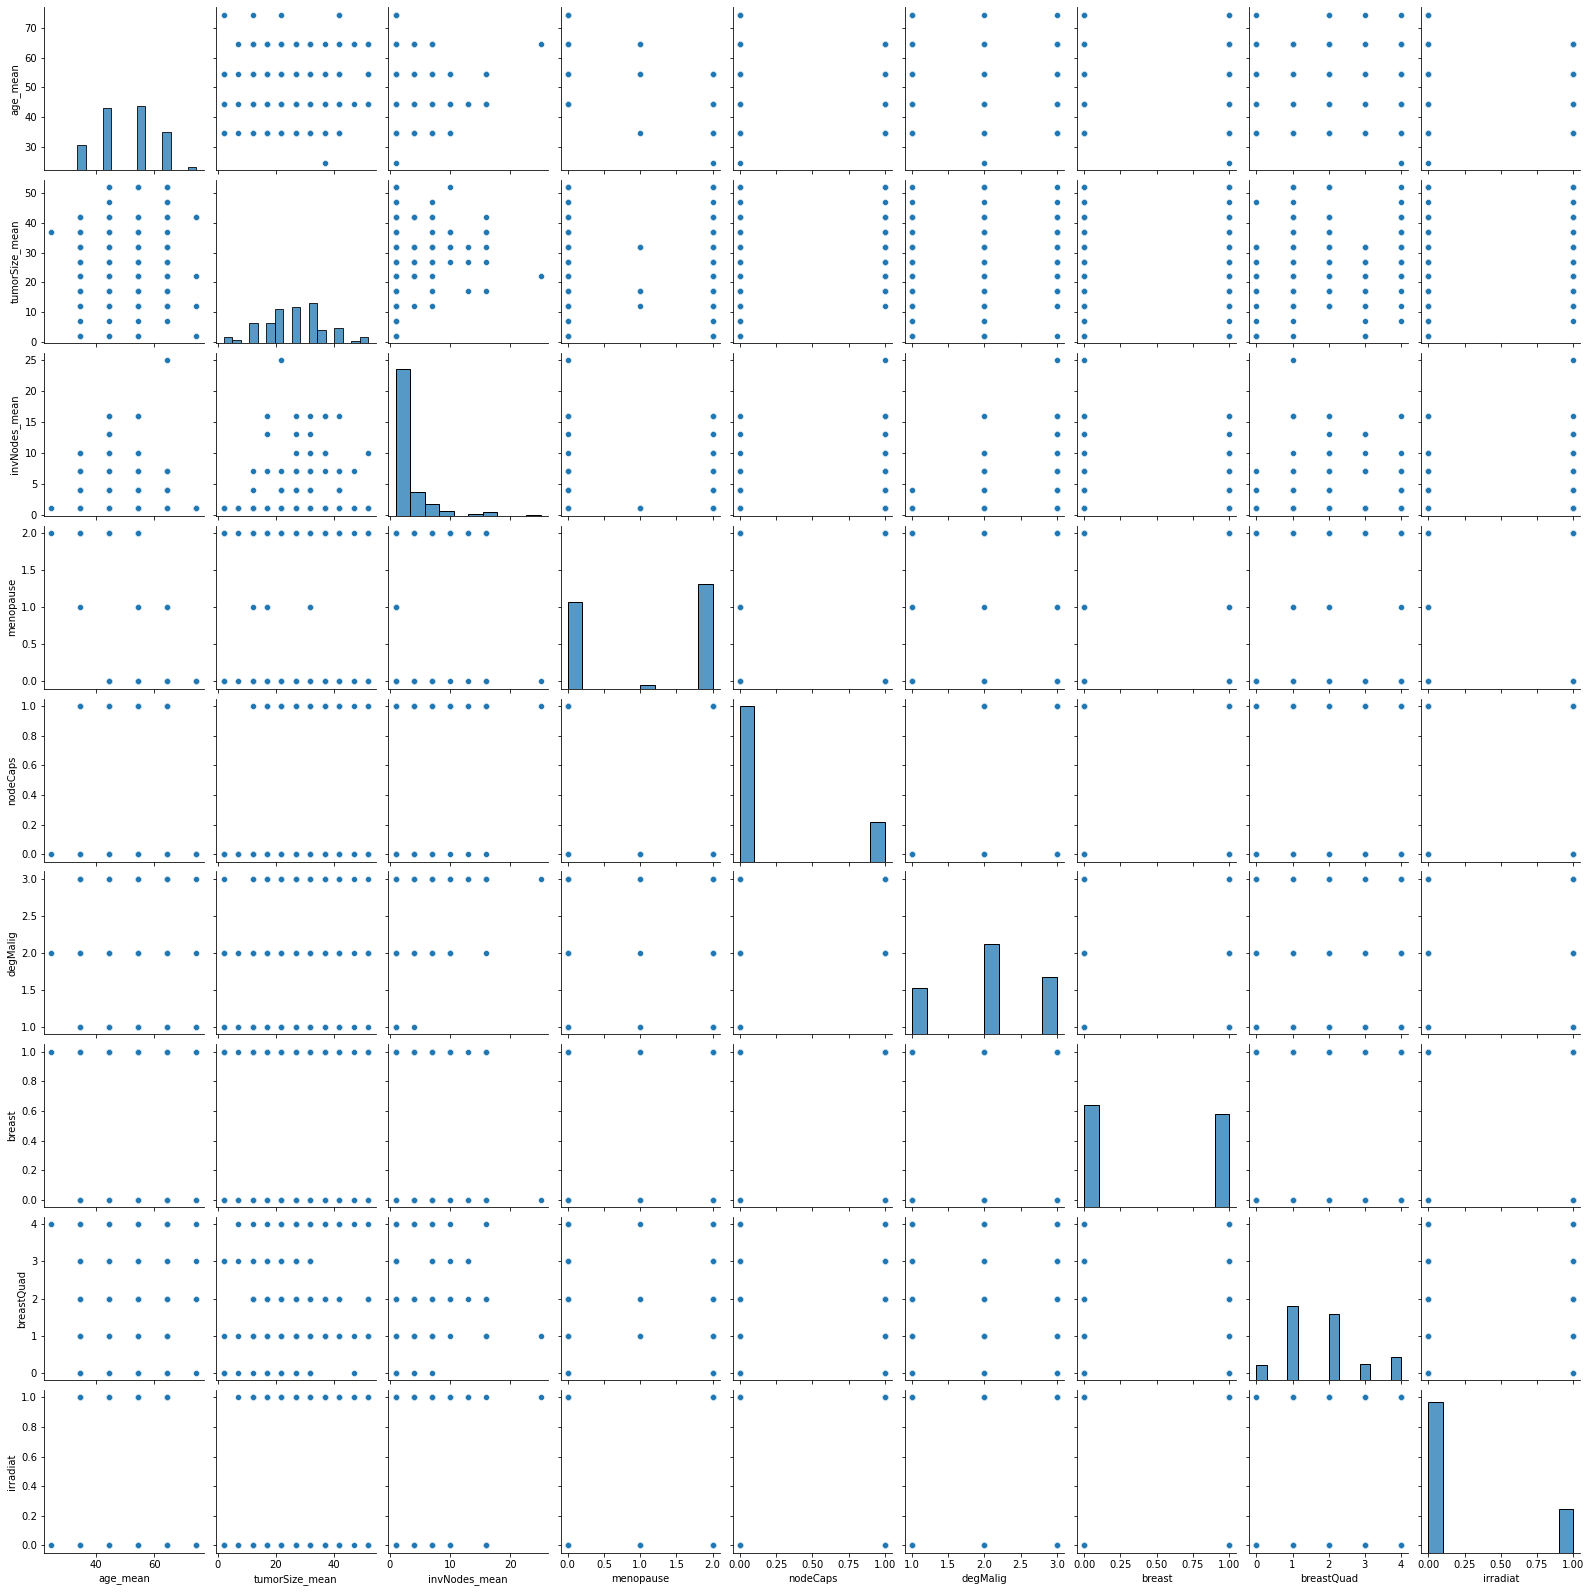

In [29]:
sns.pairplot(X)

<AxesSubplot:xlabel='age_mean', ylabel='tumorSize_mean'>

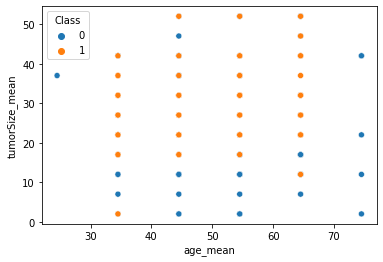

In [53]:
sns.scatterplot(x= 'age_mean', y= 'tumorSize_mean', hue= 'Class', data= data)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

## Split the Data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size= 0.3, random_state= 42)

## Training the Model

In [34]:
# k_NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric= 'minkowski', p= 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52  4]
 [23  5]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        56
           1       0.56      0.18      0.27        28

    accuracy                           0.68        84
   macro avg       0.62      0.55      0.53        84
weighted avg       0.65      0.68      0.62        84



In [36]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [37]:
for i, k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)

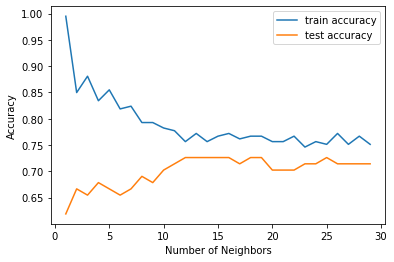

In [38]:
plt.plot(neighbors, train_accuracy, label = 'train accuracy')
plt.plot(neighbors, test_accuracy, label = 'test accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
knn = KNeighborsClassifier(n_neighbors=26, metric= 'minkowski', p= 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  0]
 [24  4]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        56
           1       1.00      0.14      0.25        28

    accuracy                           0.71        84
   macro avg       0.85      0.57      0.54        84
weighted avg       0.80      0.71      0.63        84



In [51]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel= 'rbf')
svclassifier.fit(x_train, y_train)
y_predicted = svclassifier.predict(x_test)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[55  1]
 [25  3]]
              precision    recall  f1-score   support

           0       0.69      0.98      0.81        56
           1       0.75      0.11      0.19        28

    accuracy                           0.69        84
   macro avg       0.72      0.54      0.50        84
weighted avg       0.71      0.69      0.60        84



In [48]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_pred = logReg.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7261904761904762